Data loaded successfully from ../data/raw/data.csv
Data preprocessing completed.
Descriptive statistics:
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.10434

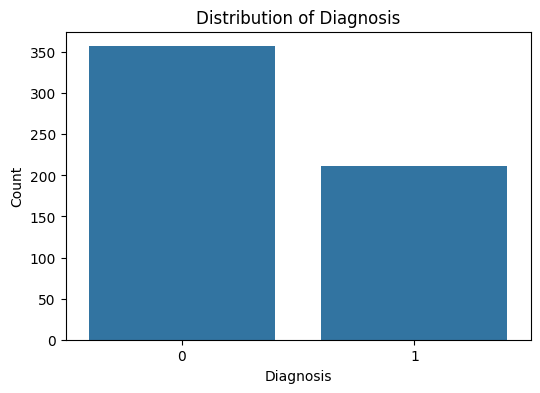

<Figure size 1200x800 with 0 Axes>

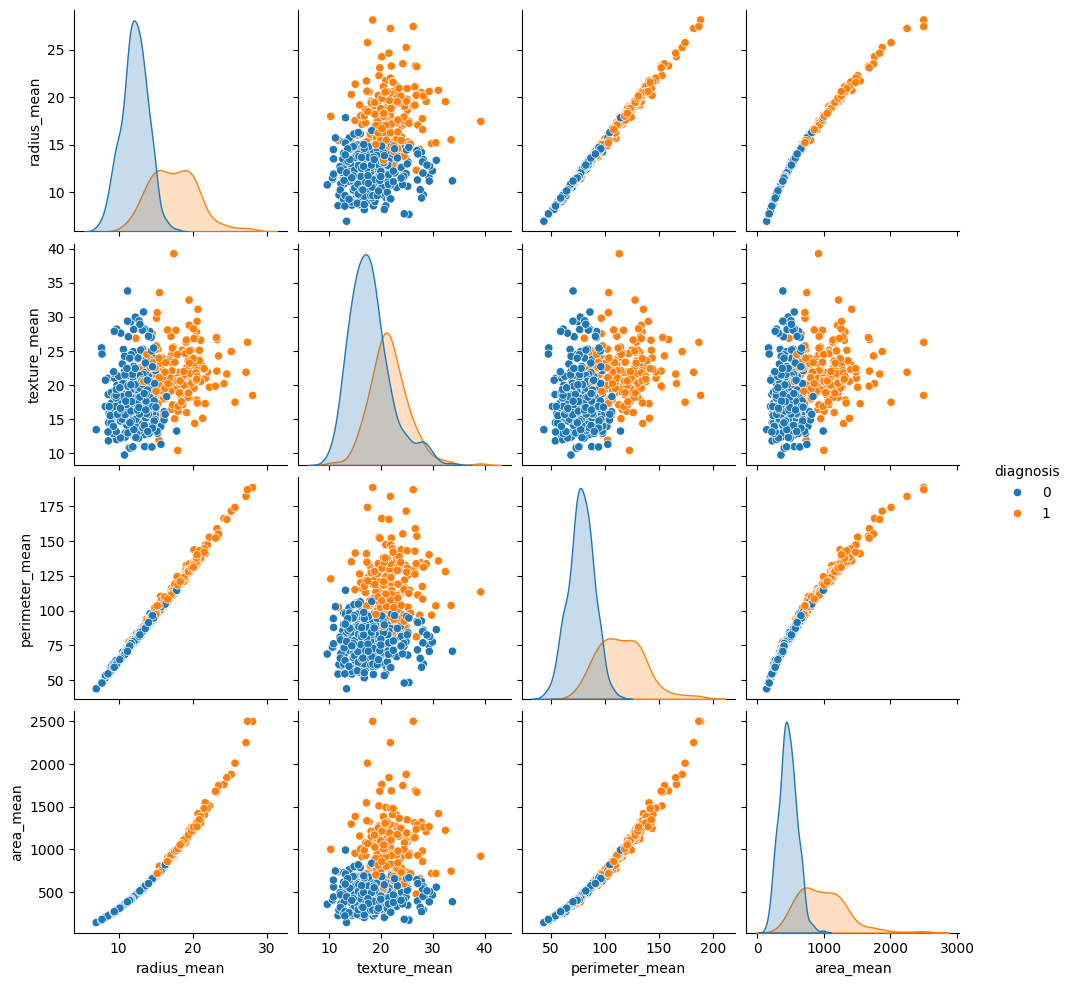

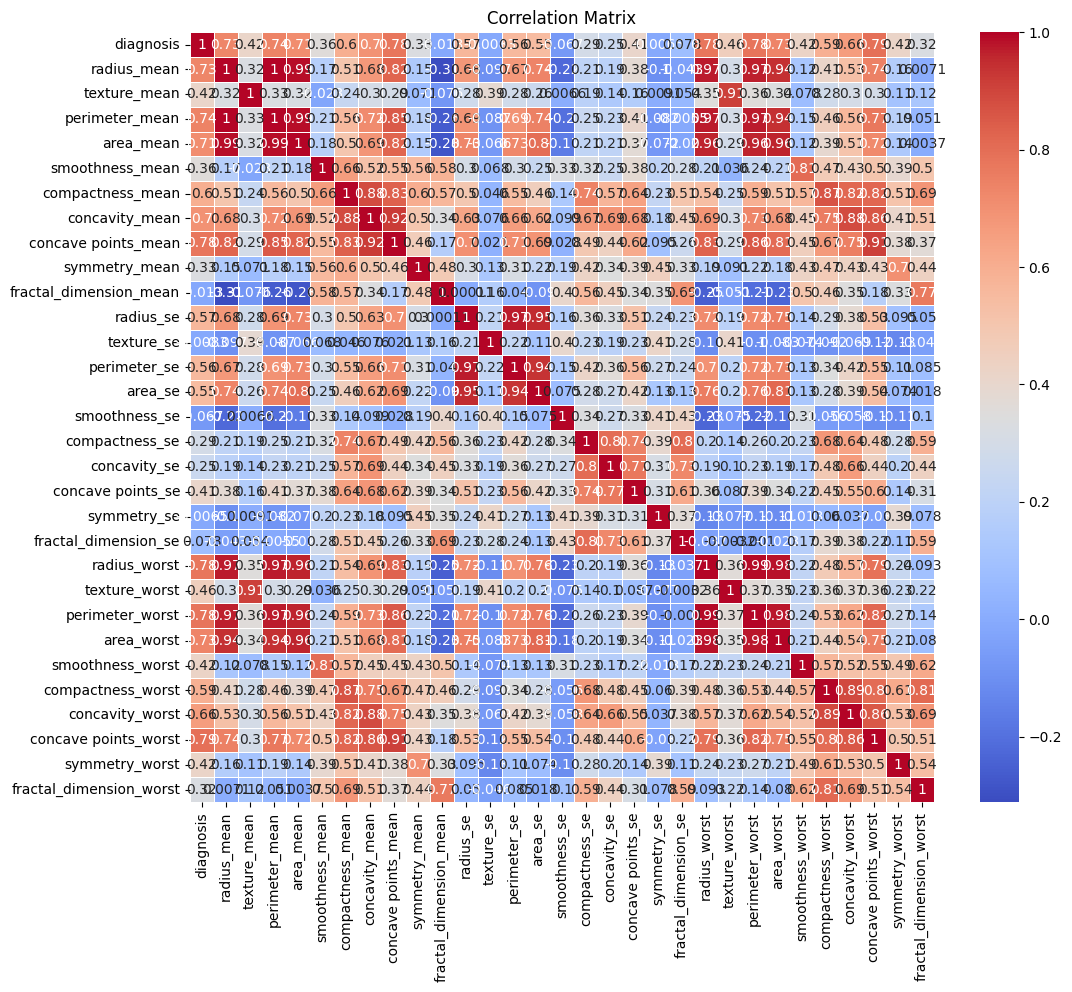


Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Highly correlated features (correlation > 0.90):
                  Fea

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_preprocessing import DataProcessor

# Initialize DataProcessor
data_path = '../data/raw/data.csv'
processor = DataProcessor(data_path)

# Load and preprocess the data
processor.load_data()
processor.preprocess_data()

# Get the preprocessed data
data = processor.data

# Descriptive statistics
print("Descriptive statistics:")
print(data.describe())

# Check for class imbalance
print("\nClass distribution:")
print(data['diagnosis'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between features and the target variable
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()

# Compute correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Filter highly correlated features
corr_threshold = 0.9
highly_correlated = corr_matrix[corr_matrix > corr_threshold].stack().reset_index()
highly_correlated.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nHighly correlated features (correlation > {:.2f}):".format(corr_threshold))
print(highly_correlated)